In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import pickle
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/willcline/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [206]:
path = "../../data/News_Category_Dataset_v2.json"

In [213]:
df = pd.read_json(path,lines=True)

In [214]:
df.head(2)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26


In [215]:
df.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [220]:
df.category = df.category.replace(["ARTS"], "ARTS & CULTURE").replace(['THE WORLDPOST'], 'WORLD NEWS').replace(['STYLE'], 'STYLE & BEAUTY')\
.replace(['TASTE'], 'FOOD & DRINK').replace(['WELLNESS'], 'HEALTHY LIVING').replace(['PARENTING'], 'PARENTS').replace(['MONEY'], 'BUSINESS')\
.replace(['COLLEGE'], 'EDUCATION').replace(['GREEN'], 'ENVIRONMENT')
df = df[~df.category.isin(['WEIRD NEWS', 'IMPACT', 'GOOD NEWS'])]

In [231]:
df = df[~df.category.isin(['WEIRD NEWS', 'IMPACT', 'GOOD NEWS'])]

In [232]:
df.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'POLITICS', 'BLACK VOICES',
       'WOMEN', 'COMEDY', 'QUEER VOICES', 'SPORTS', 'BUSINESS', 'TRAVEL',
       'MEDIA', 'TECH', 'RELIGION', 'SCIENCE', 'LATINO VOICES',
       'EDUCATION', 'PARENTS', 'ARTS & CULTURE', 'STYLE & BEAUTY',
       'ENVIRONMENT', 'FOOD & DRINK', 'HEALTHY LIVING', 'WORLDPOST',
       'FIFTY', 'HOME & LIVING', 'DIVORCE', 'WEDDINGS', 'CULTURE & ARTS'],
      dtype=object)

In [ ]:
#test to see if combined
df[df["category"]=="CRIME"]

In [131]:
ind = 20
C = 'ENTERTAINMENT'
print(df[df['category']==C].reset_index()["headline"][ind])
print(df[df['category']==C].reset_index()["short_description"][ind])
print(df[df['category']==C].reset_index()["link"][ind])


Emilia Clarke Dishes On Her Final 'Game Of Thrones' Scene
Now we're really curious about the farewell season.
https://www.huffingtonpost.com/entry/emilia-clarke-game-of-thrones-final-scne_us_5b08137fe4b0568a880ac1af


In [95]:
travel = df[df['category']=="TRAVEL"].reset_index(drop=True)

In [97]:
#iloc finds specific index(30)
travel_test = travel.iloc[[ind]]

In [81]:
entertainment = df[df['category']=="ENTERTAINMENT"].reset_index(drop=True)

In [82]:
#iloc finds specific index(20)
entertainment_test = ENTERTAINMENT.iloc[[ind]]

In [70]:
wellness = df[df['category']=="WELLNESS"].reset_index(drop=True)

In [71]:
#iloc finds specific index(29ish)
wellness_test = wellness.iloc[[ind]]

In [107]:
entertainment_article = """
Emilia Clarke had a few intriguing things to say about her character Daenerys Targaryen’s final moment on “Game of Thrones,” set to air in 2019.

“It fucked me up,” the 31-year-old actress told Vanity Fair.
“Knowing that is going to be a lasting flavor in someone’s mouth of what Daenerys is ... ”

And if that’s not enough to whet your appetite for the HBO fantasy, she said of the entire farewell season: “I’m doing all this weird shit. You’ll know what I mean when you see it.”

She gave no hint as to whether Daenerys will win dominion over all seven kingdoms of Westeros, so we’ll just have to stay tuned. 

“It really is the most heartbreaking thing to be filming the last of anything,” Clarke told “Good Morning America” on Wednesday. “I’ve become an emotional wreck on set. They’re like ‘Emilia…it’s OK,’ and I’m like, ‘But it’s the last time!’”

Fans hope the time will fly until the final season arrives.


In the meantime, Clarke can be seen playing Qi’ra in “Solo: A Star Wars Story” and doing a poor Chewbacca impression on a talk show.
"""

In [104]:
travel_article = """

United Airlines is evaluating the way it handles pets after a string of animal-related mishaps last week — including one incident in which a puppy died in an aircraft’s overhead bin.

The company announced on Tuesday that it will temporarily stop taking new reservations for PetSafe, its program in which animals travel in the plane’s cargo compartment, until May 1. It will, however, still honor reservations that have already been made for the service.

“We are deeply committed to the safety and comfort of the animals and pets in our care,” the airline wrote in a post on its site. “We are conducting a thorough and systematic review of our program for pets that travel in the cargo compartment to make improvements that will ensure the best possible experience for our customers and their pets.”

Last week was an extraordinary bad week for pets flying on United. On Tuesday, a German shepherd wound up in Japan and a Great Dane flew to Kansas City, Missouri, after the airline mixed up their destinations.

On Thursday, a St. Louis-bound flight had to take a sudden detour when the airline discovered it had loaded a dog in cargo that was meant to go to Akron, Ohio.

United told the Chicago Tribune that all three dogs were reunited with their owners and all 33 passengers aboard the diverted flight to St. Louis were compensated for the inconvenience.

These hiccups, however, pale in comparison to a heartbreaking incident that occurred on Monday, when a 10-month-old French bulldog died after its owners said a flight attendant insisted the puppy and its carrier be stored in the cabin’s overhead bin and the animal suffocated.

Though United is temporarily pausing its program for pets traveling in cargo, the suspension will not affect pets that are traveling with their owners in cabins.

United’s announcement on Tuesday mentions that the company is reviewing its service for cabin-flying pets and will “issue bright colored bag tags to help better identify pets who are traveling in-cabin.”

When HuffPost asked United for additional information about pets flying in cabins, the company directed us to its detail about colored tags. The company also said the “flight attendant did not hear or understand” the passengers who were asked to store the carrier containing their puppy in the overhead bin, which United called a “tragic accident.”"""

In [105]:
wellness_article = """What does it mean to be happy? It is the most elusive of questions, and permeates much of our daily lives. While we toil away in our work and personal lives, we secretly pray for happiness. "I just want to be happy," so many people say. But do we even know what happiness is?

In the past few years, a science of happiness has cropped up in the field of psychology. There are many studies on every aspect of happiness, the most coveted of all human achievements. After much scientific discussion and review, researchers have come to define happiness as the ability to sustain an overall sense of well being over time. However, the capacity to generate and maintain well-being while coping with daily challenges requires quite a bit of emotional flexibility.

Traditionally, scientists suggested that a person's happiness might have a particular "set-point," a level above which he or she does not usually reach. Yet recent studies are finding new and interesting trends. Sonja Lyubomirsky, Ph.D., happiness researcher and author of The How of Happiness and The Myths of Happiness, says that people are more able to play a direct role in the attainment of their own joy than earlier studies indicated. Her research showed that happiness levels increased when people took a few surprisingly simple steps:

• Count your blessings
• Reframe situations in a positive light
• Perform acts of kindness

Those participants who expressed gratitude and kept an optimistic outlook were less depressed and happier than the control group. Happy people, Lyubomirsky says, choose to be happy by taking steps to ensure it.

It might not be as difficult as it sounds. As filmmaker Woody Allen put it in the film Shadows and Fog, "...we're all happy, if we only knew it." So, perhaps attaining happiness is more about uncovering the joy that is already within us -- though clouded over with doubt -- rather than seeking to find it "out there." Much like we think the sky is ominous and overcast until we board an airplane, ascend through the clouds, and see that, yes, the sun is actually shining all the time. Through this new reorientation, discovering well-being as innate, we start to glimpse the inner wellspring from which happiness flows.

Another important aspect of happiness is human connection and physical touch. An Australian study measured the relationship between the health and happiness of almost 60,000 males. The study found that men who hugged scored above the national male average for happiness, were thinner, and even wealthier, than men who didn't hug. The evidence is clear: more hugs equals more happiness. The problem is that most of us are looking for happiness in all the wrong places, chasing after ephemeral phantom wisps rather than the real thing.

There is a big difference between hedonic happiness (getting a shiny new car) and eudemonic happiness (focusing on meaning). One is fleeting, the other long lasting. Contrary to some of our most basic fears, happiness is not something to be earned. In contrast, the truth is that every person has a birthright to happiness, just for having been born. At the same time, there is no happiness "how-to" handbook. Thus, in my quest to discover exactly how to achieve the happiness we all so desperately seek, I met with a highly revered Tibetan Lama, Gelek Rimpoche, the spiritual director of Jewel Heart in Ann Arbor, Michigan.

Sitting quietly in his office study, I asked the Lama what helps people experience a richer life? "Satisfaction," he quickly answered. "It is very important to learn how to be satisfied with whatever you have in life. And desire?" he continued. "Desires have no limitations; they always 'want.' If you let desire run your life, you're in big trouble. And if you know how to have satisfaction and be happy, then you'll know how to manage your life, no matter whether you're rich, poor, man, woman, child -- whatever you may be. Compassion is key to happiness," he explained, "and compassion is based on love."
Eudemonic happiness is experienced as a byproduct of love. While hanging out with a best friend, being with our family, watching a sunset, taking a walk on the beach, or listening to the sounds of a favorite song, we transcend our ordinary state of mind and feel happiness deep in our belly, happiness that has the capacity to soften our heart. A new designer handbag (handsome as it is), can never deliver this kind of happiness.
"""

In [108]:
test_articles = [entertainment_article,wellness_article,travel_article]

In [103]:
#Create app_test_df with 3 sample rows from 3 popular columns
app_test_df = entertainment_test.append([wellness_test,travel_test])

In [169]:
app_test_df.reset_index(drop=True,inplace=True)

In [176]:
#add matching articles to app test df for deployment testing
pd.DataFrame(app_test_df[app_test_df['headline']=="Emilia Clarke Dishes On Her Final 'Game Of Thrones' Scene"])["headline"].item()

"Emilia Clarke Dishes On Her Final 'Game Of Thrones' Scene"

In [168]:
app_test_df

,category,headline,authors,link,short_description,date,article
0,ENTERTAINMENT,Emilia Clarke Dishes On Her Final 'Game Of Thr...,Ron Dicker,https://www.huffingtonpost.com/entry/emilia-cl...,Now we're really curious about the farewell se...,2018-05-25,\nEmilia Clarke had a few intriguing things to...
1,WELLNESS,Mindfulness in Everyday Life: Desperately Seek...,"Donna Rockwell, Contributor\nClinical Psycholo...",https://www.huffingtonpost.com/entry/mindfulne...,What does it mean to be happy? It is the most ...,2014-04-17,What does it mean to be happy? It is the most ...
2,TRAVEL,United Airlines Temporarily Suspends Cargo Tra...,Elyse Wanshel,https://www.huffingtonpost.com/entry/united-su...,The decision follows multiple pet-related mish...,2018-03-20,\n\nUnited Airlines is evaluating the way it h...


In [137]:
app_test_df['authors'].iloc[[1]]

29    Donna Rockwell, Contributor\nClinical Psycholo...
Name: authors, dtype: object

In [134]:
app_test_df.to_csv("app_test_df.csv")

In [ ]:
df['all_words'] = df['headline'] + "; " + df['short_description']

In [8]:
df['category'] = df['category'].replace(['CULTURE & ARTS'],'ARTS & CULTURE')

In [9]:
df.drop(['link', 'date'], axis=1, inplace=True)

In [10]:
df.head(2)

,category,headline,authors,short_description,all_words
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...


In [11]:
value_counts = round(df.category.value_counts(normalize=True)*100,2)

## By categories

In [12]:
#gets cat df, X, and y
def get_cat(cat, df):
    cat_df = df[df['category']==cat]
    cat_X = df.drop('category', axis=1)
    cat_y = df.category
    return cat_df, cat_X, cat_y

In [13]:
crime_df, crime_X, crime_y = get_cat('CRIME', df)

## Cleans, Lemmatizes, Tokenizes each Category and puts them in Dictionary. Dictionary is Pickled and function call is commented out so it doesn't load every time

In [14]:
def cat_eda(df):
    category_list = df['category'].value_counts().index.tolist()
    
    cat_df_dict = {}
    for category in category_list:
        cat_df, cat_X, cat_y = get_cat(category, df)
        cat_df['lower_desc'] = cat_df['headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))
        cat_df['lower_desc'] = cat_df['lower_desc'].str.replace('[^\w\s]','')
        #stopword gathering and removal
        stop = stopwords.words('english')
        cat_df['lower_desc'] = cat_df['lower_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
        desc_str = ' '.join(cat_df['lower_desc'].tolist())
        tokens = nltk.word_tokenize(desc_str) #tokenizing
        #lemmatize after tokenizing
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
        tokens = nltk.word_tokenize(lemmatized_tokens)
        
#         tfidf_vect = TfidfVectorizer(analyzer=tokens)
#         X_tfidf = tfidf_vect.fit_transform(df[category])
        fdist_pos = nltk.FreqDist(tokens)
        top_100_words = fdist_pos.most_common(100)
        top_words_df = pd.DataFrame(top_100_words, columns = ('word', 'count'))
        
        cat_df_dict[category] = top_words_df
    return cat_df_dict
#         print(tfidf_vect)
#         print(X_tfidf) 

In [18]:
cat_df_dict = cat_eda(df)

# with open('cat_df_dict.pickle', 'wb') as handle:
#     pickle.dump(cat_df_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

<ipython-input-14-eebd8b023015>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['lower_desc'] = cat_df['headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))
<ipython-input-14-eebd8b023015>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['lower_desc'] = cat_df['lower_desc'].str.replace('[^\w\s]','')
<ipython-input-14-eebd8b023015>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

POLITICS
WELLNESS
ENTERTAINMENT
TRAVEL
STYLE & BEAUTY
PARENTING
HEALTHY LIVING
QUEER VOICES
FOOD & DRINK
BUSINESS
COMEDY
SPORTS
BLACK VOICES
HOME & LIVING
PARENTS
THE WORLDPOST
WEDDINGS
WOMEN
IMPACT
DIVORCE
CRIME
MEDIA
WEIRD NEWS
GREEN
WORLDPOST
RELIGION
ARTS & CULTURE
STYLE
SCIENCE
WORLD NEWS
TASTE
TECH
MONEY
ARTS
FIFTY
GOOD NEWS
ENVIRONMENT
COLLEGE
LATINO VOICES
EDUCATION


In [16]:
with open('cat_df_dict.pickle', 'rb') as handle:
    cat_df_dict = pickle.load(handle)

AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from '/Users/willcline/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/pandas/core/internals/blocks.py'>

In [86]:
#which categories have the most articles?
top_topics = round(df["category"].value_counts(normalize=True)*100, 2)

In [93]:
top_topics_df = pd.DataFrame(top_topics)

In [96]:
top_topics_df.columns=['percentage']

In [99]:
top_topics_df['percentage']= top_topics_df['percentage'].apply(lambda per: str(per)+ '%')

In [102]:
len(top_topics_df)

40

In [100]:
#outputs top 7 topics which account for 50% of the articles
top_topics_df[:7]

,percentage
POLITICS,16.3%
WELLNESS,8.88%
ENTERTAINMENT,7.99%
TRAVEL,4.92%
STYLE & BEAUTY,4.8%
PARENTING,4.32%
HEALTHY LIVING,3.33%


### Print the top words for any category by changin "cat" variable in next line

In [29]:
cat_top = cat_df_dict[cat].sort_values(by='count', ascending=False)

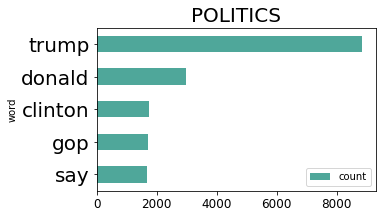

In [76]:
cat = "POLITICS"
fig, ax = plt.subplots(figsize=(5,3))
cat_top = cat_df_dict[cat].sort_values(by='count',ascending=False).head()
cat_top.plot.barh(x='word',
                      y='count',
                      ax=ax,
                      color="#4FA79A", fontsize=20).invert_yaxis()

ax.set_title(f"{cat}", fontsize=20)
ax.tick_params(axis='x', labelsize=12)

plt.show()

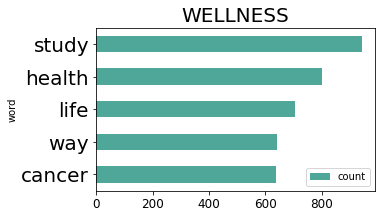

In [77]:
cat = "WELLNESS"
fig, ax = plt.subplots(figsize=(5,3))
cat_top = cat_df_dict[cat].sort_values(by='count',ascending=False).head()
cat_top.plot.barh(x='word',
                      y='count',
                      ax=ax,
                      color="#4FA79A", fontsize=20).invert_yaxis()

ax.set_title(f"{cat}", fontsize=20)
ax.tick_params(axis='x', labelsize=12)

plt.show()

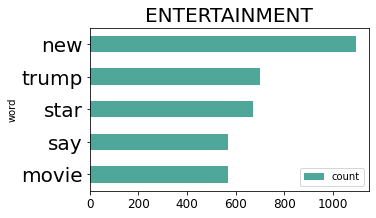

In [78]:
cat = "ENTERTAINMENT"
fig, ax = plt.subplots(figsize=(5,3))
cat_top = cat_df_dict[cat].sort_values(by='count',ascending=False).head()
cat_top.plot.barh(x='word',
                      y='count',
                      ax=ax,
                      color="#4FA79A", fontsize=20).invert_yaxis()

ax.set_title(f"{cat}", fontsize=20)
ax.tick_params(axis='x', labelsize=12)

plt.show()

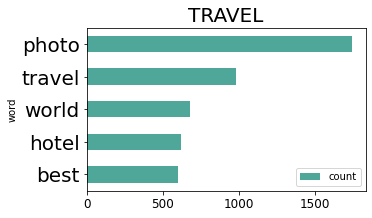

In [79]:
cat = "TRAVEL"
fig, ax = plt.subplots(figsize=(5,3))
cat_top = cat_df_dict[cat].sort_values(by='count',ascending=False).head()
cat_top.plot.barh(x='word',
                      y='count',
                      ax=ax,
                      color="#4FA79A", fontsize=20).invert_yaxis()

ax.set_title(f"{cat}", fontsize=20)
ax.tick_params(axis='x', labelsize=12)

plt.show()

### Pos tagging

In [23]:
tokens_pos = nltk.pos_tag(tokens)
pos_df = pd.DataFrame(tokens_pos, columns = ('word','POS'))
pos_sum = pos_df.groupby('POS', as_index=False).count() # group by POS tags
pos_sum_df = pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag

In [24]:
#getting just the nouns
filtered_pos = [ ]
for one in tokens_pos:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)
print (len(filtered_pos))

693120


In [137]:
#the 100 most common nouns
fdist_pos = nltk.FreqDist(filtered_pos)
top_100_words = fdist_pos.most_common(100)
# print(top_100_words)

In [135]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS
top_words_df

,pos,count,Word
0,"(photos, NNS)",7056,photos
1,"(trump, NN)",6351,trump
2,"(day, NN)",4417,day
3,"(video, NN)",4220,video
4,"(women, NNS)",2845,women
...,...,...,...
95,"(dress, NN)",746,dress
96,"(moms, NNS)",742,moms
97,"(letter, NN)",738,letter
98,"(twitter, NN)",736,twitter


In [27]:
fig, ax = plt.subplots(figsize=(15,18))
top_words_df.sort_values(by='count').plot.barh(x='Word',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in DS Job Descriptions(Without Stop Words)")

plt.show()

NameError: name 'plt' is not defined